# pHcalc

This notebook is testing the useful package [`pHcalc`](https://github.com/rnelsonchem/pHcalc) developed by Ryan Nelson. pHcalc is a Python library for systematically calculating solution pH, distribution diagrams, and titration curves.

The package was installed in the Anaconda Python distribution provided by ~~[continuum.io]~~(https://www.continuum.io/) [anaconda.com](https://www.anaconda.com/). The software versions used are listed at the end of this notebook. Most of the code in this notebook is lifted directly from the documentation page on PyPI / Github.

The package can be installed from PyPi (https://pypi.python.org/pypi/pHcalc) and the source code can be found here: https://github.com/rnelsonchem/pHcalc

In [5]:
from pHcalc.pHcalc import Acid, Neutral, System
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

### pH of 0.01 M HCl
HCl is a strong acid, so we should expect complete dissociation.

In [7]:
cl = Neutral(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 1.9999

1.99999771118


### pH of 0.01 M NaOH
NaOH is a strong base, so similar to the previous case.

In [8]:
na = Neutral(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH) # Should print 12.00000

12.0000022888


### pH of 1 M H$_2$SO$_4$
H$_2$SO$_4$ is a polyprotic acid with the pK$_a$ values (pK$_{a,1}$) -3 and (pK$_{a,2}$) 1.99. The pK$_{a,2}$ value from "Physical Constants of Organic Compounds," in CRC Handbook of Chemistry and Physics, 98th Edition (Internet Version 2018), John R. Rumble, ed., CRC Press/Taylor & Francis, Boca Raton, FL, and both pKa values can be found in http://evans.rc.fas.harvard.edu/pdf/evans_pKa_table.pdf.

In [10]:
# we'll treat it as a neutral compound with two possible dissociations here
so4 = Acid(pKa=[-3, 1.99], charge=0, conc=1.0)
system = System(so4)
system.pHsolve()
print(system.pH)

-0.00390396118164


In [12]:
# we can also treat it as a negatively charged compound (complete dissociation of first proton)
so4 = Acid(pKa=1.99, charge=-1, conc=1.0)
system = System(so4)
system.pHsolve()
print(system.pH)

-0.00433654785157


## Distribution Diagrams
For a Numpy array og pH values, a 2D array of fractional distribution values is returned, where each row is a series of distributions for each given pH. The 2D returned array can be used to plot a distribution diagram

### Phosphoric Acid

In [13]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phos.alpha(7.0) # Input pH value -> Returns array with mole fractions of  H_3PO_4, H2PO_4^-, HPO_4^2-, and PO_4^3-

array([  8.60553811e-06,   6.12037500e-01,   3.87952033e-01,
         1.86113567e-06])

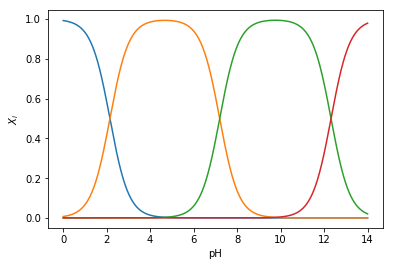

In [14]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phs = np.linspace(0, 14, 1000)
fracs = phos.alpha(phs)
plt.plot(phs, fracs)
plt.xlabel('pH')
plt.ylabel('$X_i$')
plt.show()

### Sulphuric Acid

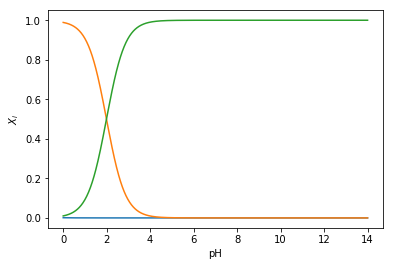

In [15]:
so4 = Acid(pKa=[-3, 1.99], charge=0, conc=1.0)
phs = np.linspace(0, 14, 1000)
fracs = so4.alpha(phs)
plt.plot(phs, fracs)
plt.xlabel('pH')
plt.ylabel('$X_i$')
plt.show()

## Titration Curves

### Phosphoric Acid

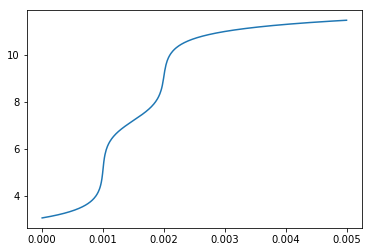

In [16]:
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
    na = Neutral(charge=1, conc=mol/sol_volume)
    system = System(phos, na)
    system.pHsolve(guess_est=True)
    phs.append(system.pH)
plt.plot(na_moles, phs)
plt.show()

In [17]:
%load_ext version_information

In [18]:
%version_information numpy, matplotlib, phcalc

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 4.10.0 35 generic x86_64 with debian stretch sid
numpy 1.13.1
matplotlib 2.0.2
phcalc 0.1.2
Thu Oct 05 08:49:54 2017 CEST